## Merging, Joining, and Concatenation

These are operations used to combine data from multiple sources based on common columns or indexes. Merging combines data based on common columns, similar to a database join operation. Concatenation combines data along a particular axis (row-wise or column-wise) without considering common columns.


In [1]:
#merging 
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'C': [7, 8, 9]})

# Merge based on the common column 'A'
merged_df = pd.merge(df1, df2, on='A')
print(merged_df)
"""This line performs a merge operation using the pd.merge() function. 
It merges the two DataFrames, df1 and df2, based on the common column 'A'.
The resulting merged DataFrame is assigned to the variable merged_df.
The on='A' parameter specifies that the merge operation should be based on the values in column 'A' 
from both DataFrames. 
This means that rows with matching values in column 'A' will be 
combined into a single row in the merged DataFrame. 
By default, 
pd.merge() performs an inner join, 
which means only the rows with common values in the 'A' column will be included in the merged DataFrame."""

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


"This line performs a merge operation using the pd.merge() function. \nIt merges the two DataFrames, df1 and df2, based on the common column 'A'.\nThe resulting merged DataFrame is assigned to the variable merged_df.\nThe on='A' parameter specifies that the merge operation should be based on the values in column 'A' \nfrom both DataFrames. \nThis means that rows with matching values in column 'A' will be \ncombined into a single row in the merged DataFrame. \nBy default, \npd.merge() performs an inner join, \nwhich means only the rows with common values in the 'A' column will be included in the merged DataFrame."

In [2]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': [7, 8, 9]})

# Concatenate row-wise
concatenated_df = pd.concat([df1, df2])
print(concatenated_df)


   A  B
0  1  4
1  2  5
2  3  6
0  4  7
1  5  8
2  6  9



## GroupBy

GroupBy allows you to split the data into groups based on some criteria, such as a particular column's values. It is often used in combination with aggregation functions (e.g., sum, mean, count) to perform calculations within each group.


In [3]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A'],
                   'Value': [10, 15, 20, 25, 30]})

# Group by 'Category' and calculate the mean value within each group
grouped_df = df.groupby('Category').mean()
print(grouped_df)


          Value
Category       
A          20.0
B          20.0


In [4]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 15, 7, 12, 9]
})

# Group by 'Category' column and calculate the sum of 'Value' for each category
grouped_df = df.groupby('Category').sum()
print(grouped_df)


          Value
Category       
A            26
B            27


In [5]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X'],
    'Value': [10, 15, 7, 12, 9]
})

# Group by 'Category' and 'Subcategory' columns and calculate the mean of 'Value' for each combination
grouped_df = df.groupby(['Category', 'Subcategory']).mean()
print(grouped_df)


                          Value
Category Subcategory           
A        X             8.666667
B        Y            13.500000


In [6]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 15, 7, 12, 9]
})

# Group by 'Category' and calculate the custom aggregation function
def custom_agg(x):
    return np.sum(x) / np.mean(x)

grouped_df = df.groupby('Category').agg(custom_agg)
print(grouped_df)


          Value
Category       
A           3.0
B           2.0


In [7]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Name': ['John', 'Jane', 'Mike', 'Sara', 'Mark'],
    'Age': [35, 28, 42, 32, 39],
    'Salary': [80000, 75000, 90000, 82000, 95000]
})

# Define the threshold for high salaries
salary_threshold = 85000

# Group by high salaries
high_salary_group = df.groupby(df['Salary'] >= salary_threshold)

# Iterate over the groups
for group, data in high_salary_group:
    if group:
        print("High Salaries:")
    else:
        print("Low Salaries:")
    print(data)
    print()


Low Salaries:
   Name  Age  Salary
0  John   35   80000
1  Jane   28   75000
3  Sara   32   82000

High Salaries:
   Name  Age  Salary
2  Mike   42   90000
4  Mark   39   95000



In [8]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Name': ['John', 'Jane', 'Mike', 'Sara', 'Mark'],
    'Age': [35, 28, 42, 32, 39],
    'Salary': [80000, 75000, 90000, 82000, 95000]
})

# Define the threshold for low age
age_threshold = 35

# Group by low age
low_age_group = df.groupby(df['Age'] < age_threshold)

# Iterate over the groups
for group, data in low_age_group:
    if group:
        print("Low Age:")
    else:
        print("High Age:")
    print(data)
    print()


High Age:
   Name  Age  Salary
0  John   35   80000
2  Mike   42   90000
4  Mark   39   95000

Low Age:
   Name  Age  Salary
1  Jane   28   75000
3  Sara   32   82000



In [9]:
import pandas as pd

# Create a DataFrame with sales data
data = {
    'Region': ['North', 'South', 'North', 'West', 'East', 'South'],
    'Product': ['A', 'B', 'B', 'A', 'C', 'A'],
    'Sales': [1000, 500, 800, 1200, 900, 600]
}
df = pd.DataFrame(data)

# Group by region and calculate total sales
grouped_sales = df.groupby('Region')['Sales'].sum()

print(grouped_sales)


Region
East      900
North    1800
South    1100
West     1200
Name: Sales, dtype: int64


In [10]:
import pandas as pd

# Create a DataFrame with customer data
data = {
    'Name': ['John', 'Jane', 'Mike', 'Sara', 'Mark'],
    'Age': [35, 28, 42, 32, 39],
    'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Boston']
}
df = pd.DataFrame(data)

# Define age ranges
bins = [20, 30, 40, 50]
labels = ['20-29', '30-39', '40-49']

# Group by age range and count the number of customers
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels)
grouped_customers = df.groupby('Age Range')['Name'].count()

print(grouped_customers)


Age Range
20-29    1
30-39    3
40-49    1
Name: Name, dtype: int64


# Now Open this link and study the content deeply 
# " https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html "


# Discretization and Binning:

In [11]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'Values': [1, 3, 5, 7, 9]})
#Binning is a process of dividing a continuous variable into a set of bins or intervals. 
#It transforms the continuous data into discrete intervals or categories.
# Perform binning into three equal-width bins
bins = pd.cut(df['Values'], bins=3)
df['Bins'] = bins
print(df)


   Values            Bins
0       1  (0.992, 3.667]
1       3  (0.992, 3.667]
2       5  (3.667, 6.333]
3       7    (6.333, 9.0]
4       9    (6.333, 9.0]


This line performs binning on the 'Values' column of the DataFrame df using the pd.cut() function. Binning is a process of dividing a continuous variable into a set of bins or intervals. It transforms the continuous data into discrete intervals or categories.

In this case, pd.cut() takes two main arguments: the column to be binned (df['Values']) and the number of bins (bins=3). It divides the 'Values' column into three equal-width bins. The resulting bins variable holds the information about which bin each value in the 'Values' column belongs to.

python



## Discretization and Binning

Discretization is the process of transforming continuous data into discrete intervals or categories. Binning refers to dividing a continuous variable into a set of bins or intervals. These techniques are useful for analyzing data in a more manageable and interpretable way.



## Operations on DataFrames

DataFrames are a key data structure in Pandas, representing tabular data with rows and columns. There are various operations you can perform on DataFrames, such as filtering rows, selecting columns, sorting, and applying functions to data.


# Operations on DataFrames:
## Filtering rows:

In [12]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Filter rows where 'A' is greater than 1
filtered_df = df[df['A'] > 1]
print(filtered_df)
# print(df)

   A  B
1  2  5
2  3  6


# Selecting columns:

In [13]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Select only the 'A' column
selected_column = df['A']
print(selected_column)


0    1
1    2
2    3
Name: A, dtype: int64



## Data output/saving

Pandas provides functionality to save data in different formats, such as CSV, Excel, SQL databases, and more. You can use these methods to store your processed data for future use or to share it with others.



In [14]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)


## Pandas for Plotting

Pandas offers a range of plotting options to create different types of visualizations. The plots you mentioned, including area, bar, density, hist, line, scatter, barh, box, hexbin, kde, and pie plots, can be generated using Pandas.


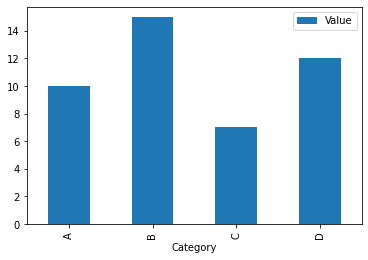

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'C', 'D'],
                   'Value': [10, 15, 7, 12]})

# Create a bar plot
df.plot(kind='bar', x='Category', y='Value')
plt.show()


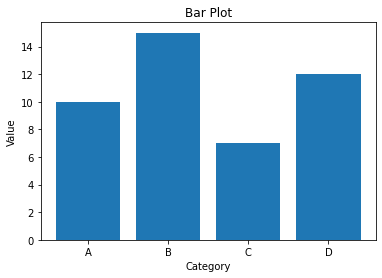

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'C', 'D'],
                   'Value': [10, 15, 7, 12]})

# Create a bar plot
plt.bar(df['Category'], df['Value'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Plot')
plt.show()


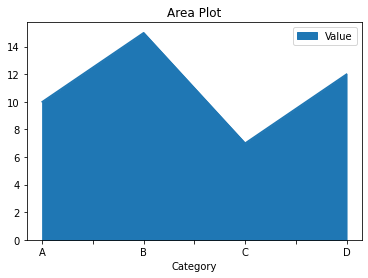

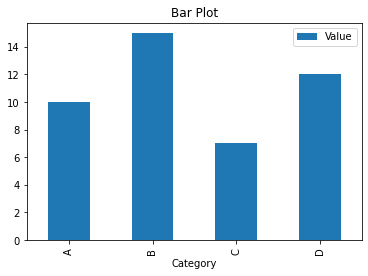

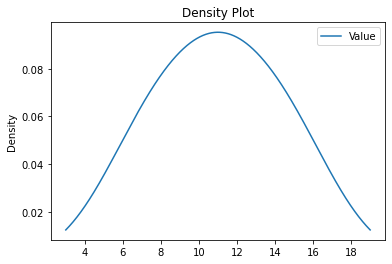

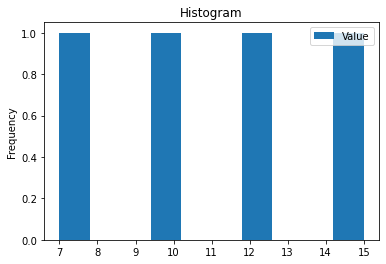

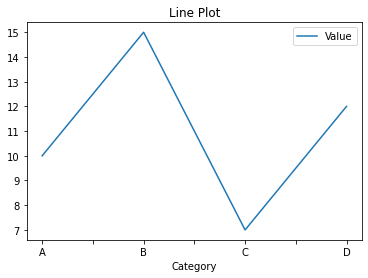

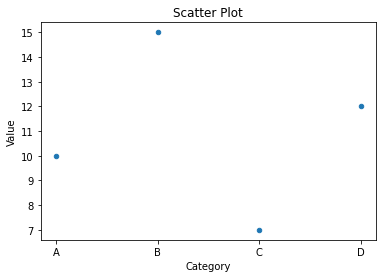

In [17]:
#Create different types of plots using Pandas
df.plot(kind='area', x='Category', y='Value')
plt.title('Area Plot')
plt.show()

df.plot(kind='bar', x='Category', y='Value')
plt.title('Bar Plot')
plt.show()

df.plot(kind='density', y='Value')
plt.title('Density Plot')
plt.show()

df.plot(kind='hist', y='Value')
plt.title('Histogram')
plt.show()

df.plot(kind='line', x='Category', y='Value')
plt.title('Line Plot')
plt.show()

df.plot(kind='scatter', x='Category', y='Value')
plt.title('Scatter Plot')
plt.show()






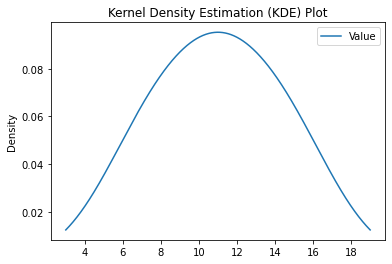

In [18]:

df.plot(kind='kde', y='Value')
plt.title('Kernel Density Estimation (KDE) Plot')
plt.show()


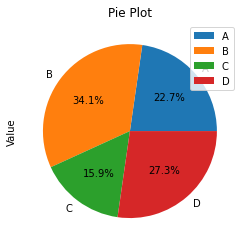

In [19]:
df.plot(kind='pie', y='Value', labels=df['Category'], autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

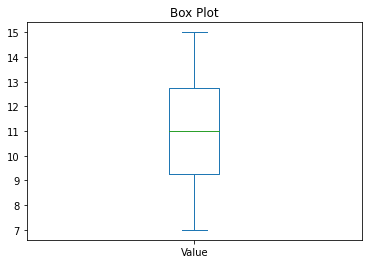

In [20]:
df.plot(kind='box', y='Value')
plt.title('Box Plot')
plt.show()

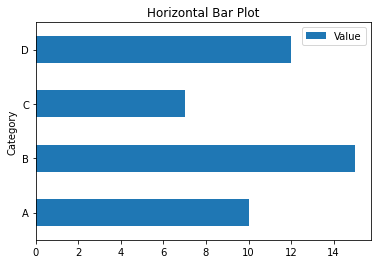

In [21]:
df.plot(kind='barh', x='Category', y='Value')
plt.title('Horizontal Bar Plot')
plt.show()


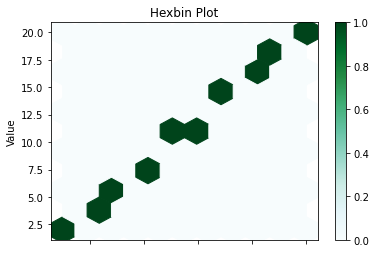

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Value': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

df = pd.DataFrame(data)

# Hexbin plot
df.plot(kind='hexbin', x='Category', y='Value', gridsize=10)
plt.title('Hexbin Plot')
plt.show()
